# Code to split the larger dataset into smaller, more appropriate datasets
### Note: please don't run this code as I didn't include the larger dataset file. Skip down to where I start the parsing and concatenaton of the season datasets

### Fetched the following dataset from Kaggle:

https://www.kaggle.com/maxhorowitz/nflplaybyplay2009to2016?select=NFL+Play+by+Play+2009-2018+%28v5%29.csv

__Below cell is in Raw mode so it doesn't run when you run all the cells__

# Parsing and Concatenation Starts Here
__Let's read in the files and concatenate them into a data frame__

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Season files are stored in the season_datasets folder and they go from 2009-2018
df = pd.concat([pd.read_csv(f"season_datasets/{season}_plays.csv") for season in range(2009, 2019)], ignore_index=True)

/home/ec2-user/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [3]:
# Let's confirm we imported properly
len(df)

340080

In [4]:
df.head(5)

,game_id,yardline_100,game_date,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,...,extra_point_attempt,two_point_attempt,field_goal_attempt,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,season
0,2009091000,58.0,2009-09-10,PIT 42,10,5,(14:53) B.Roethlisberger pass short left to H....,pass,5.0,0,...,0.0,0.0,0.0,00-0022924,B.Roethlisberger,00-0017162,H.Ward,NaN,NaN,2009
1,2009091000,53.0,2009-09-10,PIT 47,5,2,(14:16) W.Parker right end to PIT 44 for -3 ya...,run,-3.0,0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,00-0022250,W.Parker,2009
2,2009091000,56.0,2009-09-10,PIT 44,8,2,(13:35) (Shotgun) B.Roethlisberger pass incomp...,pass,0.0,1,...,0.0,0.0,0.0,00-0022924,B.Roethlisberger,00-0026901,M.Wallace,NaN,NaN,2009
3,2009091000,98.0,2009-09-10,TEN 2,10,0,(13:16) C.Johnson up the middle to TEN 2 for n...,run,0.0,0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,00-0026164,C.Johnson,2009
4,2009091000,98.0,2009-09-10,TEN 2,10,4,(12:40) K.Collins pass short left to A.Hall to...,pass,4.0,0,...,0.0,0.0,0.0,00-0003292,K.Collins,00-0024489,A.Hall,NaN,NaN,2009


In [5]:
# Let's check the type of game date as we want to ensure it is a datetime object
df.dtypes['game_date']

dtype('O')

In [6]:
# Convert to a datetime object since it wasn't already
df['game_date'] = pd.to_datetime(df['game_date'])

In [7]:
# Let's double check
df.dtypes['game_date']

dtype('<M8[ns]')

__Now that we have populated the files, let's read them and derive some extra columns we may want for our visualizations__


In [8]:
import numpy as np
import pandas as pd
import re

In [9]:
df['pass_location'].unique()

array(['left', nan, 'right', 'middle'], dtype=object)

__The pass location field doesn't provide the added level of granularity I want for my analysis so let's try parsing the description__

In [10]:
# Let's take a look at the pass plays that have no location
for description in df[(df['play_type'] == 'pass') & (df['pass_location'].isna())].sample(10).desc:
    print(description)

(:04) (Shotgun) M.Stafford sacked at DET 48 for -8 yards (C.Matthews).
(:05) (Shotgun) B.Croyle sacked at KC 33 for -11 yards (A.Barnes).
(11:11) B.Petty sacked at NYJ 39 for -8 yards (sack split by J.Addae and K.Emanuel).
(6:47) (No Huddle, Shotgun) D.Watson sacked at JAX 47 for -7 yards (M.Jackson).
(4:24) (Shotgun) J.Flacco sacked at BAL 36 for -10 yards (D.Davis).
(10:05) (Shotgun) J.McCown sacked at CLE 45 for -5 yards (B.Marshall).
(10:27) (Shotgun) M.Flynn sacked at ATL 24 for -7 yards (J.Massaquoi).
TWO-POINT CONVERSION ATTEMPT. A.Dalton pass to J.Simpson is incomplete. ATTEMPT FAILS.
(9:13) C.Henne sacked at SD 45 for -6 yards (K.Burnett).
(3:11) E.Manuel sacked at BUF 16 for -9 yards (T.Alualu).


__There are some that are passes with no location. But most of these look like sacks. So we can remove them from our analysis for now__

In [11]:
# Let's just check the number of each of the pass locations so we feel more comfortable filtering out.
print("Number of pass plays for each pass location")
print("="*50)
print("No Location: ", len(df[(df['play_type'] == 'pass') & (df['pass_location'].isna())]))
for location in ['left', 'right', 'middle']:
    print(f"{location}: ", len(df[(df['play_type'] == 'pass') & (df['pass_location'] == location)]))

Number of pass plays for each pass location
No Location:  12818
left:  62909
right:  70110
middle:  40840


In [12]:
# Let's see some sample description for each of the passing locations
for location in ['left', 'right', 'middle']:
    print("="*40, location, "="*40)
    for description in df[(df['play_type'] == 'pass') & (df['pass_location'] == location)].sample(5).desc:
        print(description)

======================================== left ========================================
(6:33) (No Huddle, Shotgun) C.Newton pass short left to B.Bersin to TB 22 for 8 yards (J.Banks; K.Tandy).
(14:14) (Shotgun) B.Bortles pass incomplete short left to A.Hurns. Penalty on JAC-A.Cann, Offensive Holding, declined.
(2:00) (Shotgun) T.Romo pass short left to C.Beasley to DAL 45 for 18 yards (A.Sendejo).
(6:31) (Shotgun) M.Stafford pass incomplete deep left to K.Durham.
(10:33) (Shotgun) R.Wilson pass short left to M.Lynch pushed ob at NYG 30 for 12 yards (P.Amukamara).
======================================== right ========================================
(7:45) T.Romo pass incomplete deep right to J.Witten [C.Redding]. Pass incomplete fly pattern; Babineaux closest defender; incomplete at the Seattle 20.
(3:02) J.Cutler pass short right to D.Hester to CHI 18 for 6 yards (T.DeCoud, B.Grimes).
(15:00) M.Schaub pass incomplete short right to C.Brown.
(12:23) T.Bridgewater pass short right to A

In [13]:
# Let's see if we can properly parse enough of the rows to get enough data for our analysis
df['pass_loc_detailed'] = df[df['play_type'] == 'pass']['desc'].str.extract(r"pass (?:incomplete )?([A-Za-z\s]+?)\.? (?:to|intended|intercepted)", flags=re.IGNORECASE)

In [14]:
# Let's see what we got!
df['pass_loc_detailed'].value_counts()

short right              56622
short left               50554
short middle             32976
deep right               12439
deep left                11969
deep middle               7699
incomplete                 103
right                       17
left                        16
middle                      12
short left end               3
short right end              2
was                          2
was thrown incomplete        1
Name: pass_loc_detailed, dtype: int64

__Since we want the extra granularity, let's just keep the first 6 listed above.__  
__Should be okay since the ones we are filtering out make up an extremely tiny portion of the data.__


In [15]:
# Let's just ensure that we can get the top 6 locations without having to hardcode based on the data
# We could also consider doing this by a percentage threshold but this is probably fine for now.
valid_locations = df['pass_loc_detailed'].value_counts().index[0:6]

In [16]:
valid_locations

Index(['short right', 'short left', 'short middle', 'deep right', 'deep left',
       'deep middle'],
      dtype='object')

In [17]:
df.loc[(df['play_type'] == 'pass') & ~(df['pass_loc_detailed'].isin(valid_locations)), 'pass_loc_detailed'] = np.nan

In [18]:
# Let's see what we got after we filtered out a bit
df['pass_loc_detailed'].value_counts()

short right     56622
short left      50554
short middle    32976
deep right      12439
deep left       11969
deep middle      7699
Name: pass_loc_detailed, dtype: int64

__Let's dig into some visuals with these passing locations__

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from time import sleep

In [20]:
pass_locations_by_season = df[~df['pass_loc_detailed'].isna()].groupby(['season', 'pass_loc_detailed']).size().to_frame("num_plays")

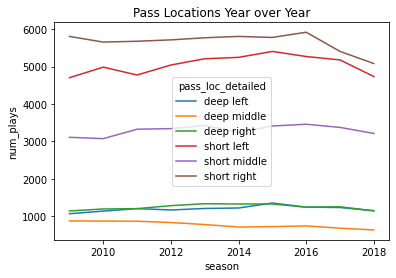

In [21]:
fig, ax = plt.subplots()
sns.lineplot(data=pass_locations_by_season.reset_index(), x='season', y='num_plays', hue='pass_loc_detailed', ax=ax);
ax.set_title("Pass Locations Year over Year");

In [22]:
# Will add a few sleep statements throughout this notebook as the matplotlib notebook is buggy when I try to run all the cells
sleep(1)

__Let's create a heatmap of the pass distribution year by year. We probably won't see drastic differences, but it'll be interesting to see the subtle differences.__

In [23]:
def getHeatMapDataForSeason(season):
    passes_by_season = pass_locations_by_season.loc[season].reset_index().copy()
    passes_by_season['depth'] = passes_by_season['pass_loc_detailed'].str.extract(r"^(\w+)")
    passes_by_season['side'] = passes_by_season['pass_loc_detailed'].str.extract(r"(\w+)$")
    passes_by_season.drop(columns="pass_loc_detailed", inplace=True)
    return passes_by_season

In [24]:
# Let's increase the font size in our plots
import matplotlib

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

<IPython.core.display.Javascript object>


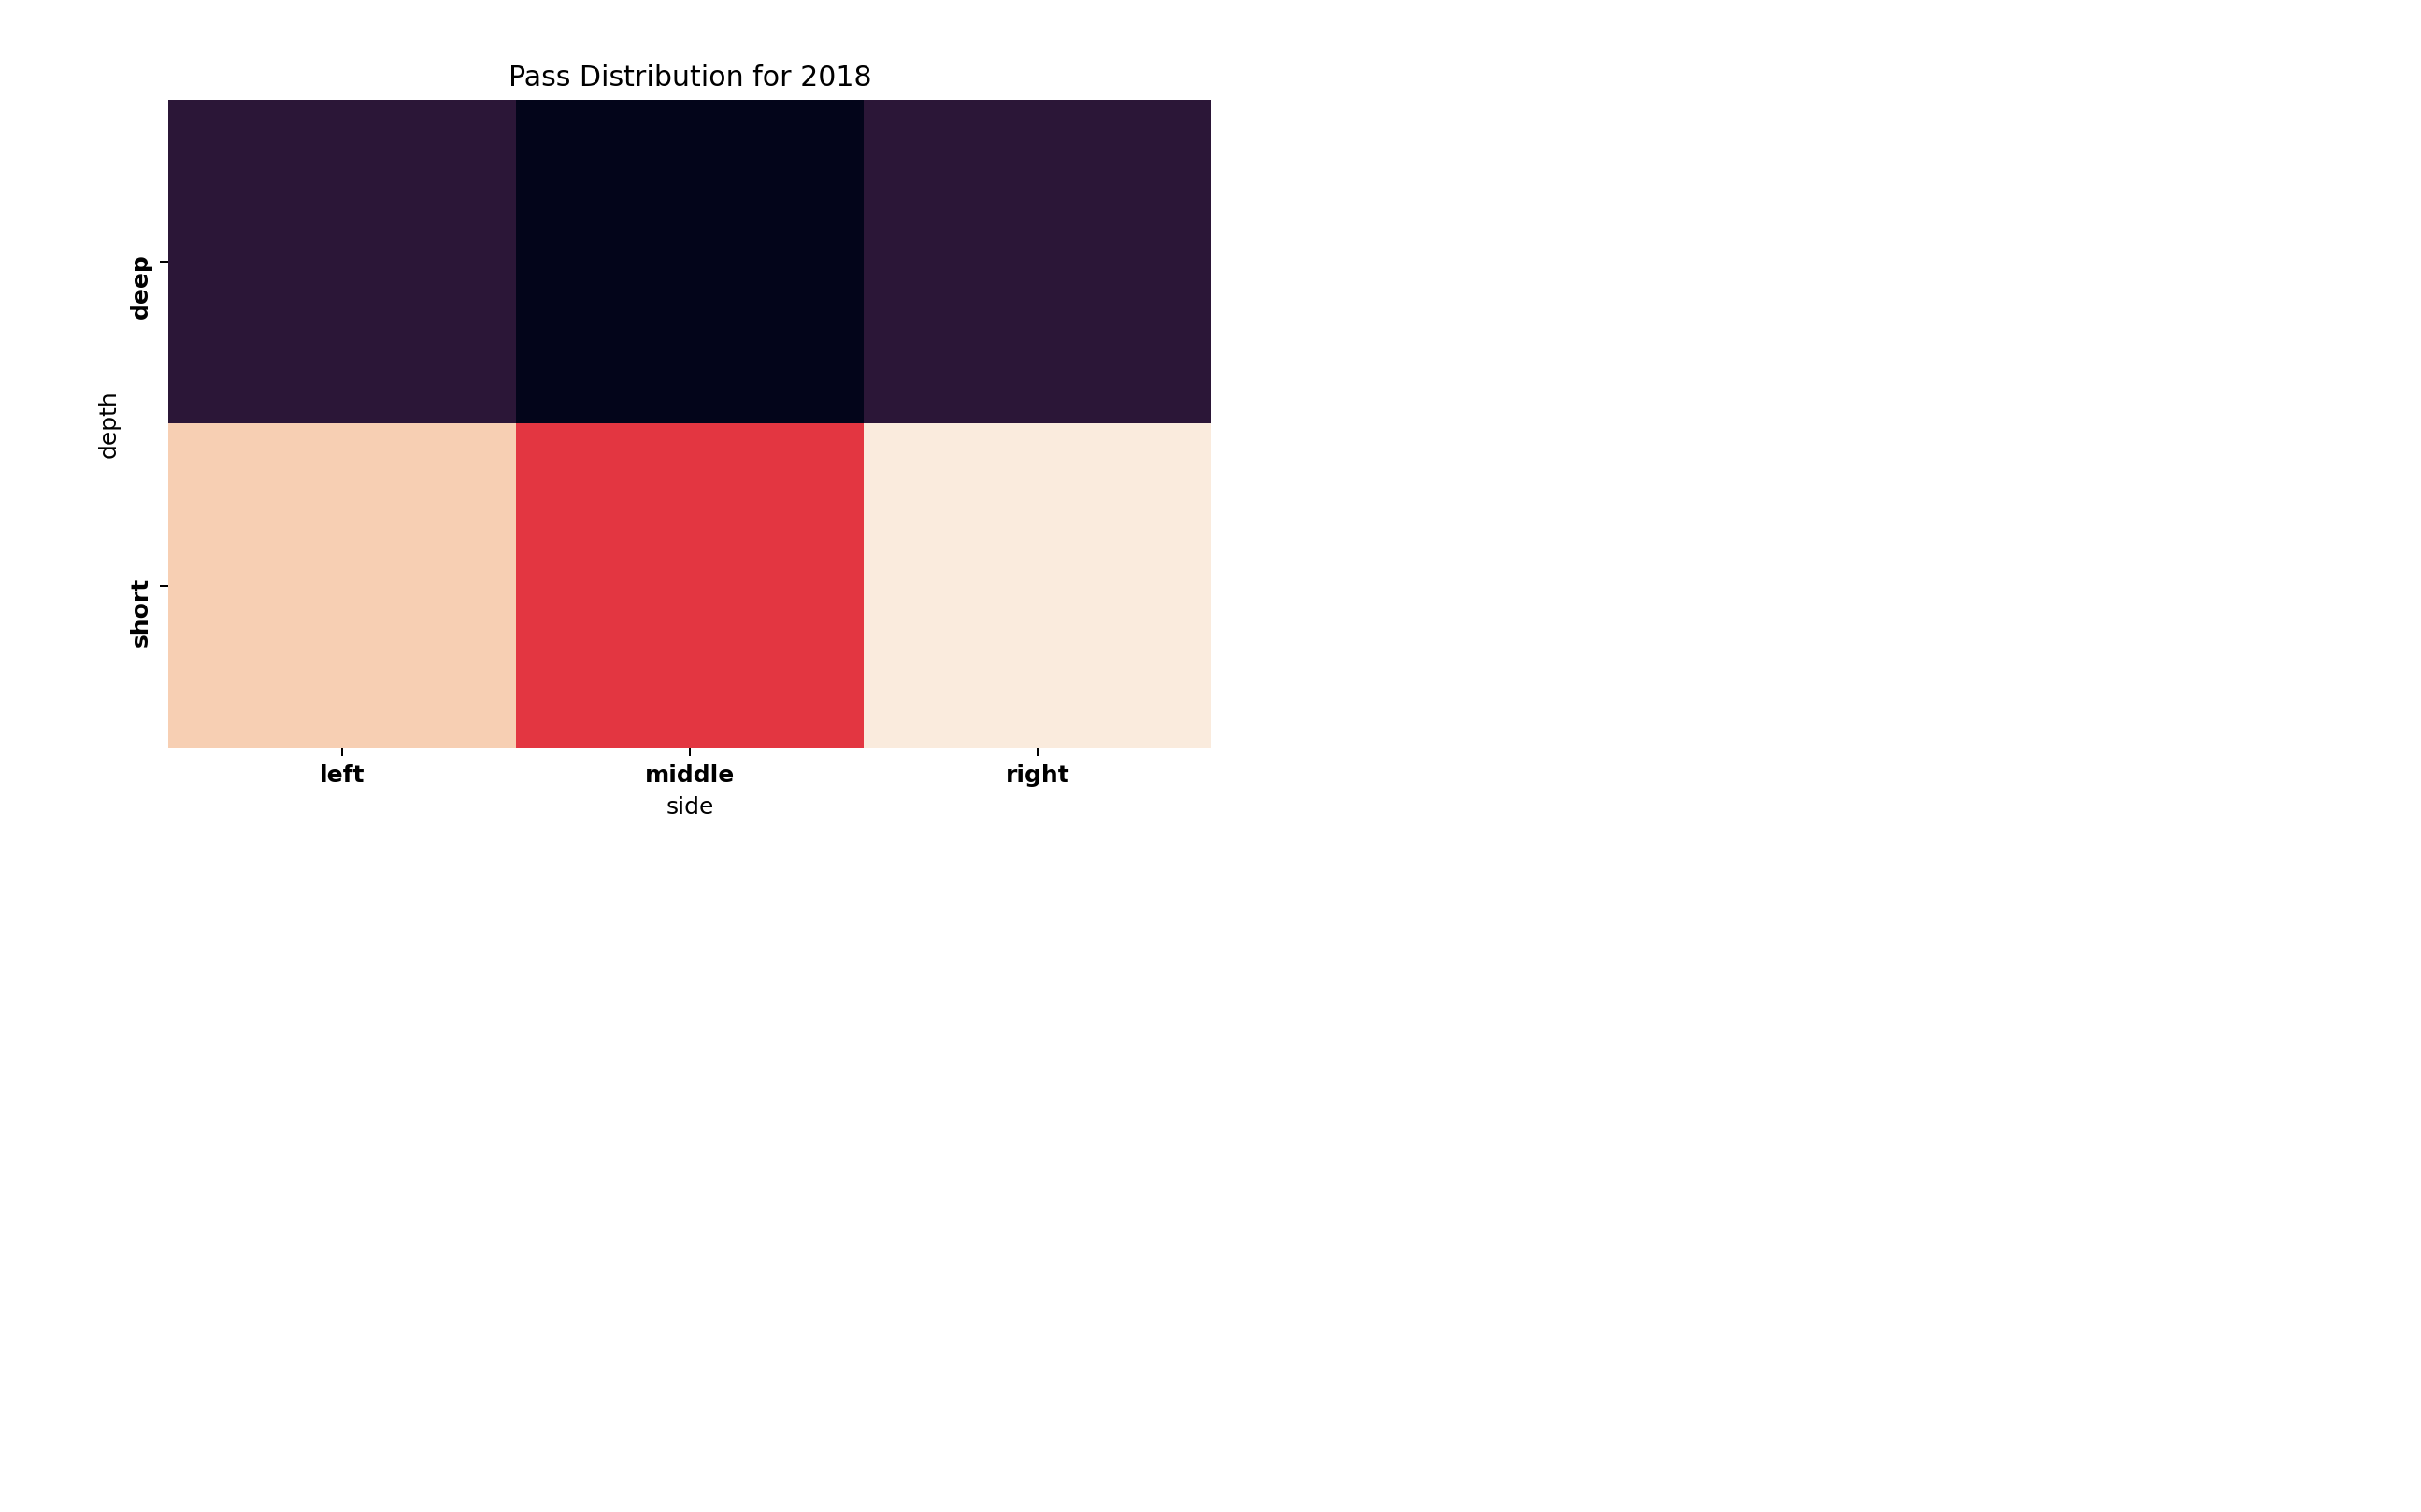

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


In [25]:
%matplotlib notebook

fig, ax = plt.subplots(figsize=(8,5))
for season in range(2009, 2019):
    passes_by_season = getHeatMapDataForSeason(season)

    sns.heatmap(passes_by_season.pivot("depth", "side", "num_plays"), ax = ax, cbar=False)
    ax.set_title(f"Pass Distribution for {season}")
    fig.canvas.draw()
    sleep(0.5)

In [26]:
# Close the plot; it'll leave the last heatmap that was plotted on the screen
sleep(2)
plt.close()

__Now, let's spit out all the heatmaps for use later__

<IPython.core.display.Javascript object>


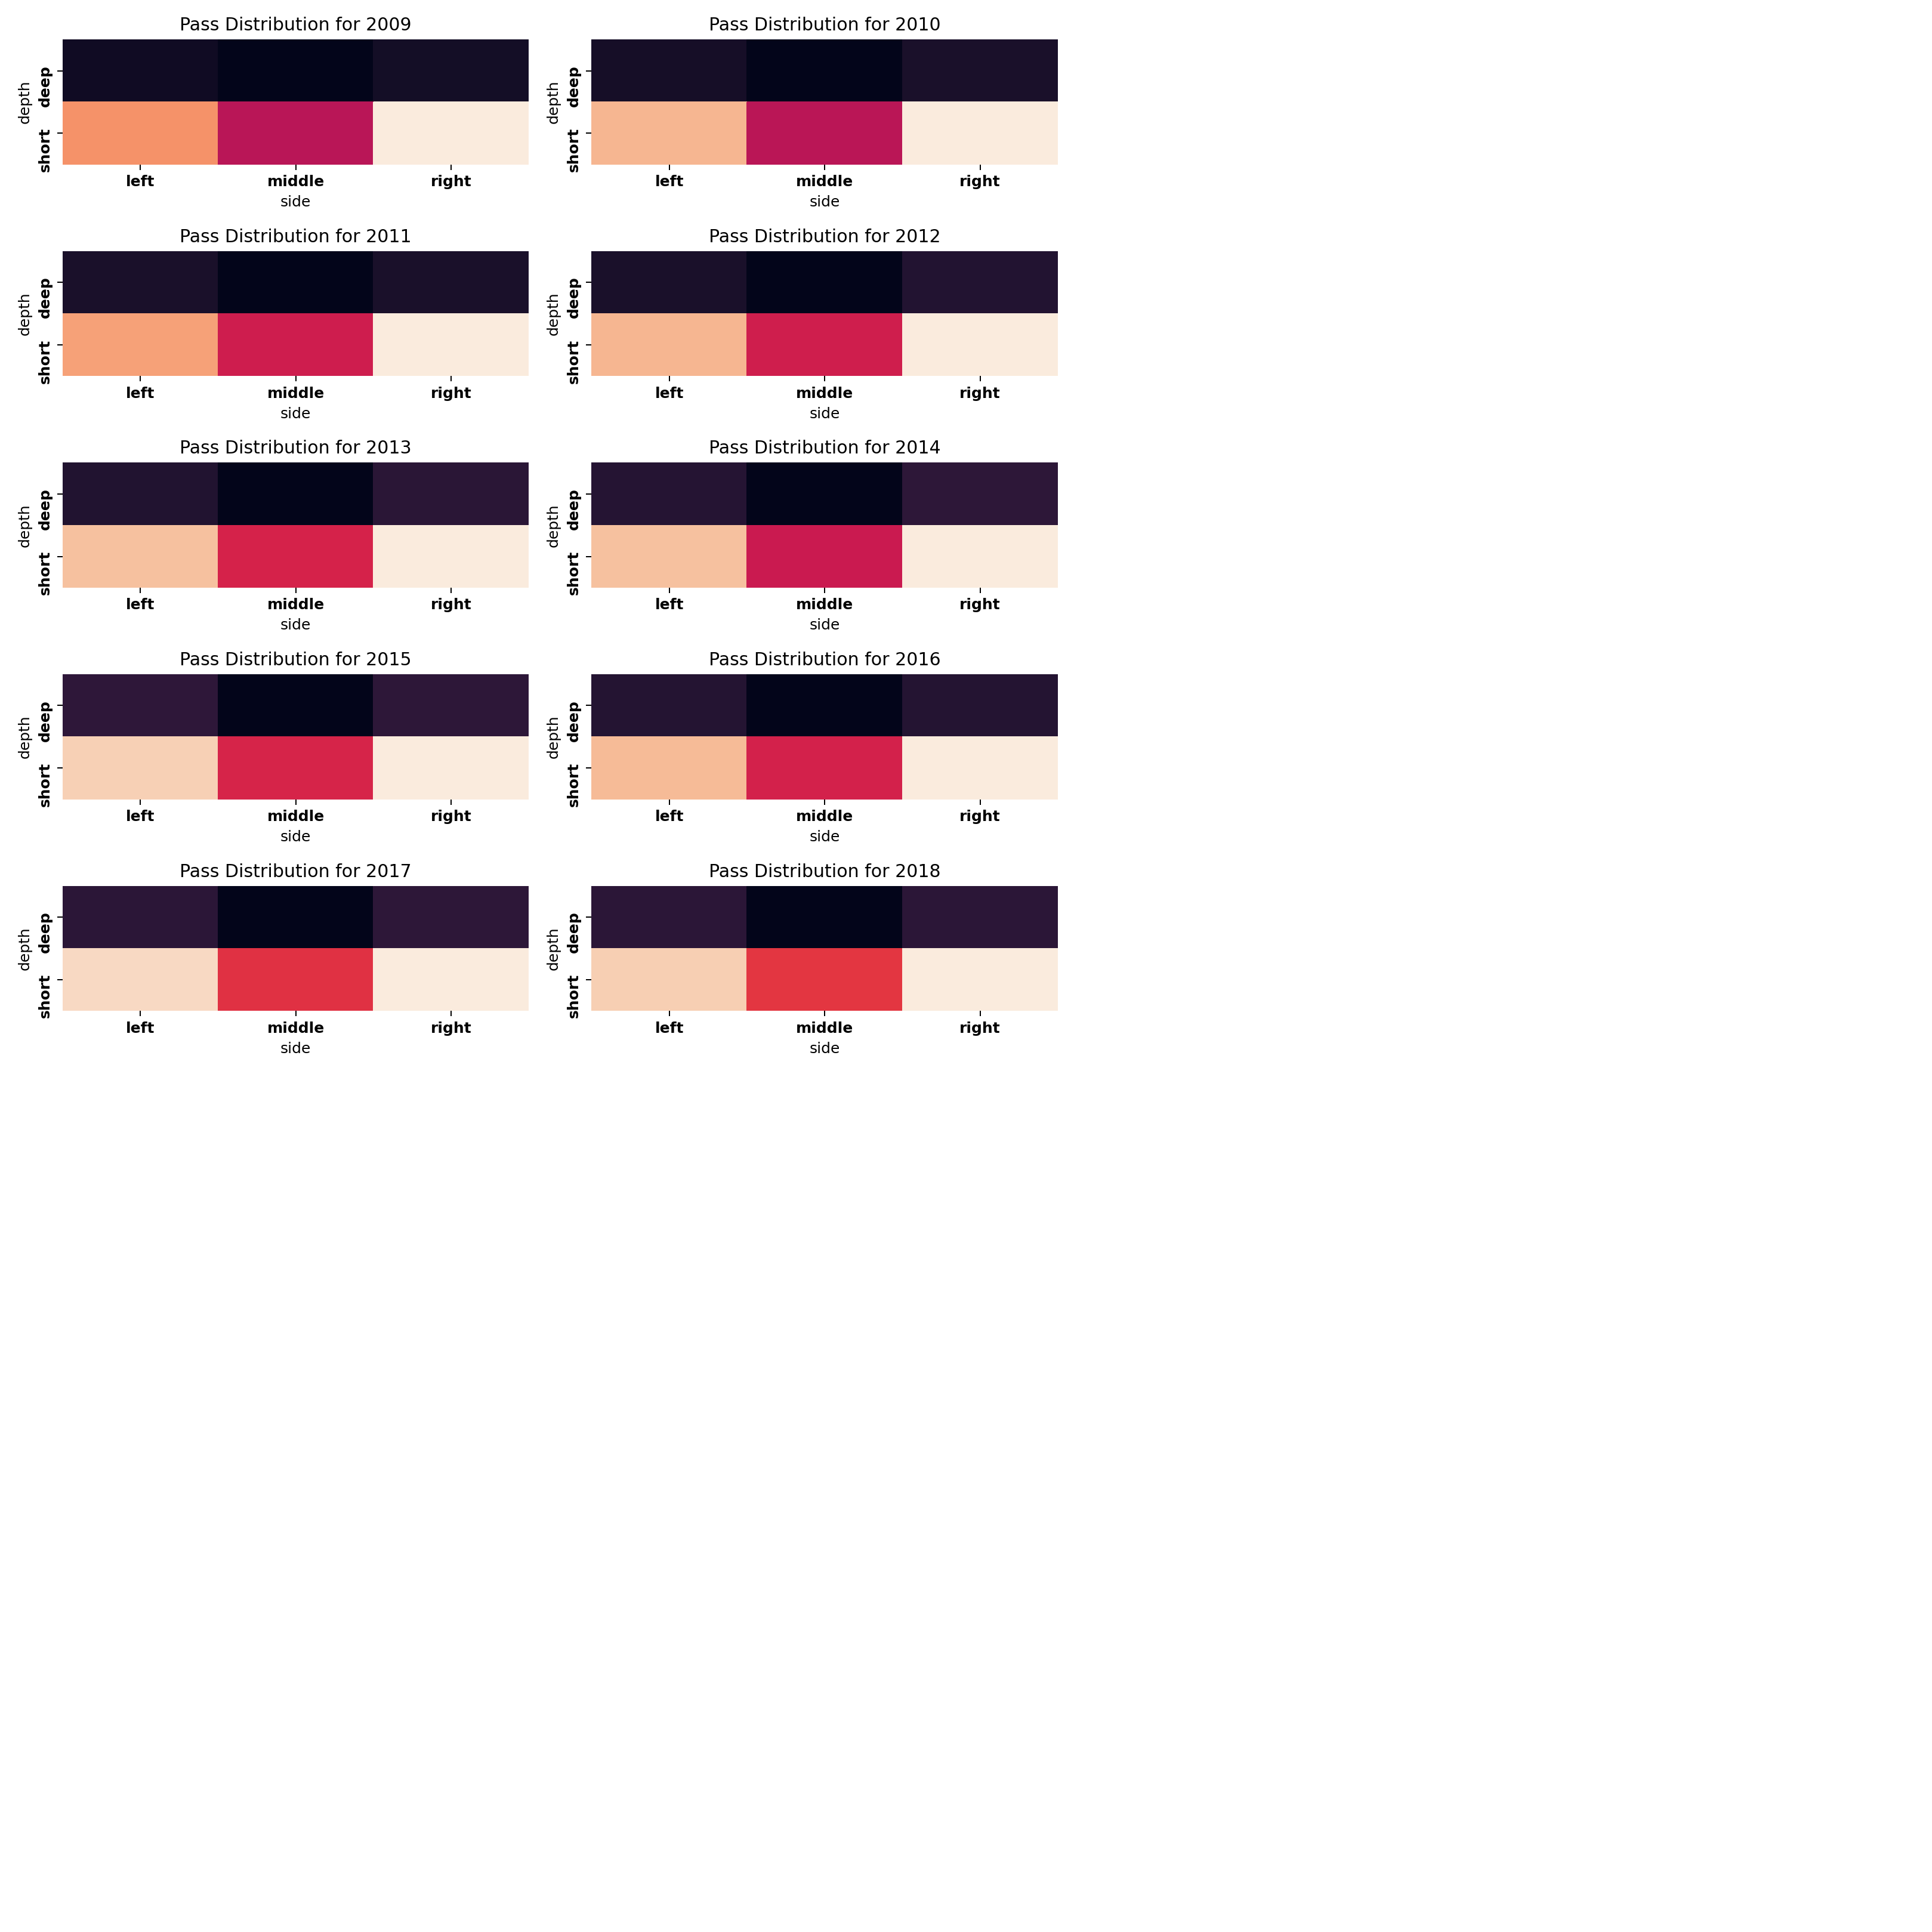

In [27]:
fig, ax = plt.subplots(5, 2, figsize=(10, 10))
plot_num = 0
for season in range(2009, 2019):
    passes_by_season = getHeatMapDataForSeason(season)
    row = plot_num//2
    col = plot_num%2
    sns.heatmap(passes_by_season.pivot("depth", "side", "num_plays"), ax = ax[row][col], cbar=False)
    ax[row][col].set_title(f"Pass Distribution for {season}")
    plot_num += 1
    plt.show()
fig.tight_layout()

In [28]:
# Save the figure and close the plot so we can reuse
sleep(2)
plt.close()
fig.savefig("images/pass_distribution_heatmaps_by_season.png")

__For fun, let's inspect the field goal and extra point success over the years.__

In [29]:
# Let's first see the possible values for the extra point.
df.loc[df['play_type'] == 'extra_point', 'extra_point_result'].unique()

array(['good', 'failed', 'blocked', 'aborted'], dtype=object)

__We only want to consider plays where the kicker actually kicked the ball. So we can filter out "aborted"__

In [30]:
# Let's swap aborted to NaN
df['extra_point_result'] = df['extra_point_result'].replace(to_replace="aborted", value=np.nan)

In [31]:
# Let's double check that we only have 3 non-NaN results
df.loc[df['play_type'] == 'extra_point', 'extra_point_result'].unique()

array(['good', 'failed', 'blocked', nan], dtype=object)

In [32]:
# Let's just rename to Made or Missed for ease
df['extra_point_result'] = df['extra_point_result'].replace(to_replace=["good", "failed", "blocked"], value=["Made", "Missed", "Missed"])

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
xp_kicks_by_season = df[df['extra_point_result'] == 'Made'].groupby(['season']).agg({'extra_point_result': 'count'}).div(df[~df['extra_point_result'].isna()].groupby(['season']).agg({'extra_point_result': 'count'})).rename(columns={"extra_point_result": "XP Pct"})

<IPython.core.display.Javascript object>


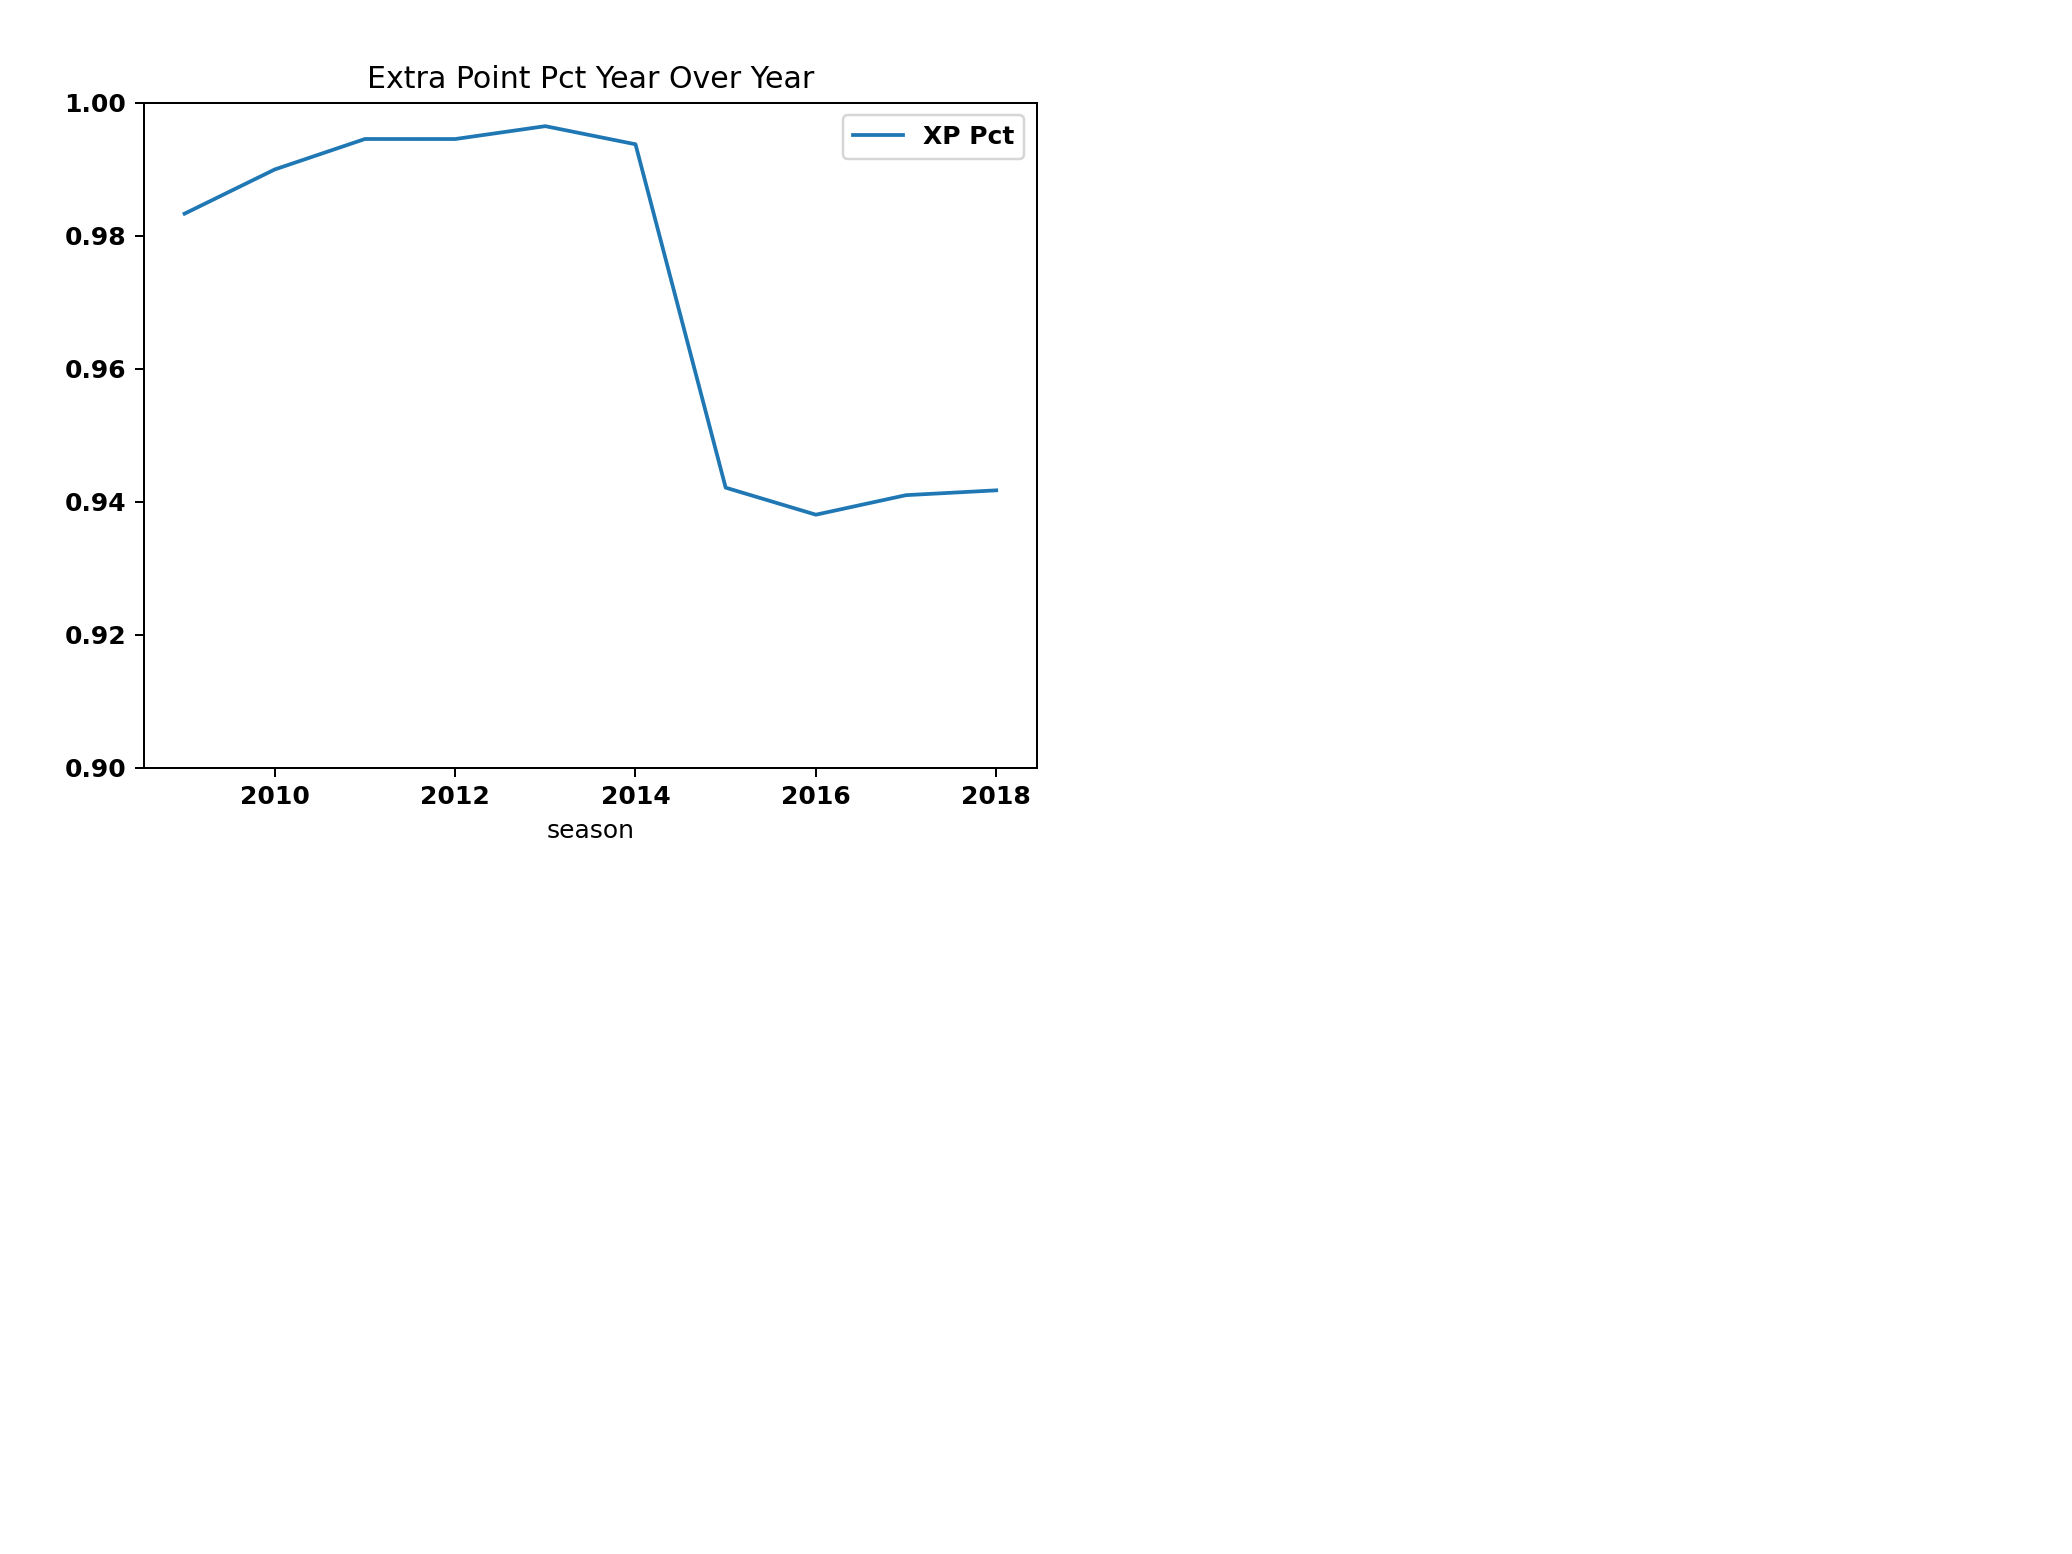

In [35]:
fig, ax = plt.subplots()
sns.lineplot(data=xp_kicks_by_season, ax=ax)
ax.set(ylim=(.9, 1));
ax.set_title("Extra Point Pct Year Over Year")
plt.show()

In [36]:
# Save the figure and close the plot so we can reuse
sleep(2)
plt.close()
fig.savefig("images/xp_pct_by_year.png")

__NOW, field goal time!!!__

In [37]:
# Let's first see the possible values for the field goal
df.loc[df['play_type'] == 'field_goal', 'field_goal_result'].unique()

array(['missed', 'blocked', 'made'], dtype=object)

In [38]:
# Let's just classify a block as a miss
df['field_goal_result'] = df['field_goal_result'].replace(to_replace="blocked", value="missed")

In [39]:
# Let's verify it changed
df.loc[df['play_type'] == 'field_goal', 'field_goal_result'].unique()

array(['missed', 'made'], dtype=object)

In [40]:
# Now, let's check if we have any NaN for kick distance
len(df[(df['play_type'] == 'field_goal') & (df['kick_distance'].isna())])

8

In [41]:
# Since a small number, let's just use the yard line and add 18 to get the kick distance.
df.loc[(df['play_type'] == 'field_goal') & (df['kick_distance'].isna()), 'kick_distance'] = df[(df['play_type'] == 'field_goal') & (df['kick_distance'].isna())]['yardline_100'] + 18

In [42]:
# Let's double check it worked
len(df[(df['play_type'] == 'field_goal') & (df['kick_distance'].isna())])

0

In [43]:
def convertKickDistanceToFgRange(distance):
    rangeBegin = int(10*(distance//10))
    return f"{rangeBegin}-{rangeBegin+9}"

In [44]:
df['fg_range'] = df[df['play_type'] == 'field_goal']['kick_distance'].map(convertKickDistanceToFgRange, na_action='ignore')

In [45]:
# Let's check if it spit out what we expected
df['fg_range'].unique()

array([nan, '30-39', '40-49', '20-29', '50-59', '60-69', '10-19', '70-79'],
      dtype=object)

In [46]:
fg_kicks_by_season = df[~df['fg_range'].isna()].groupby(['season', 'fg_range']).size().to_frame("num_kicks")

<IPython.core.display.Javascript object>


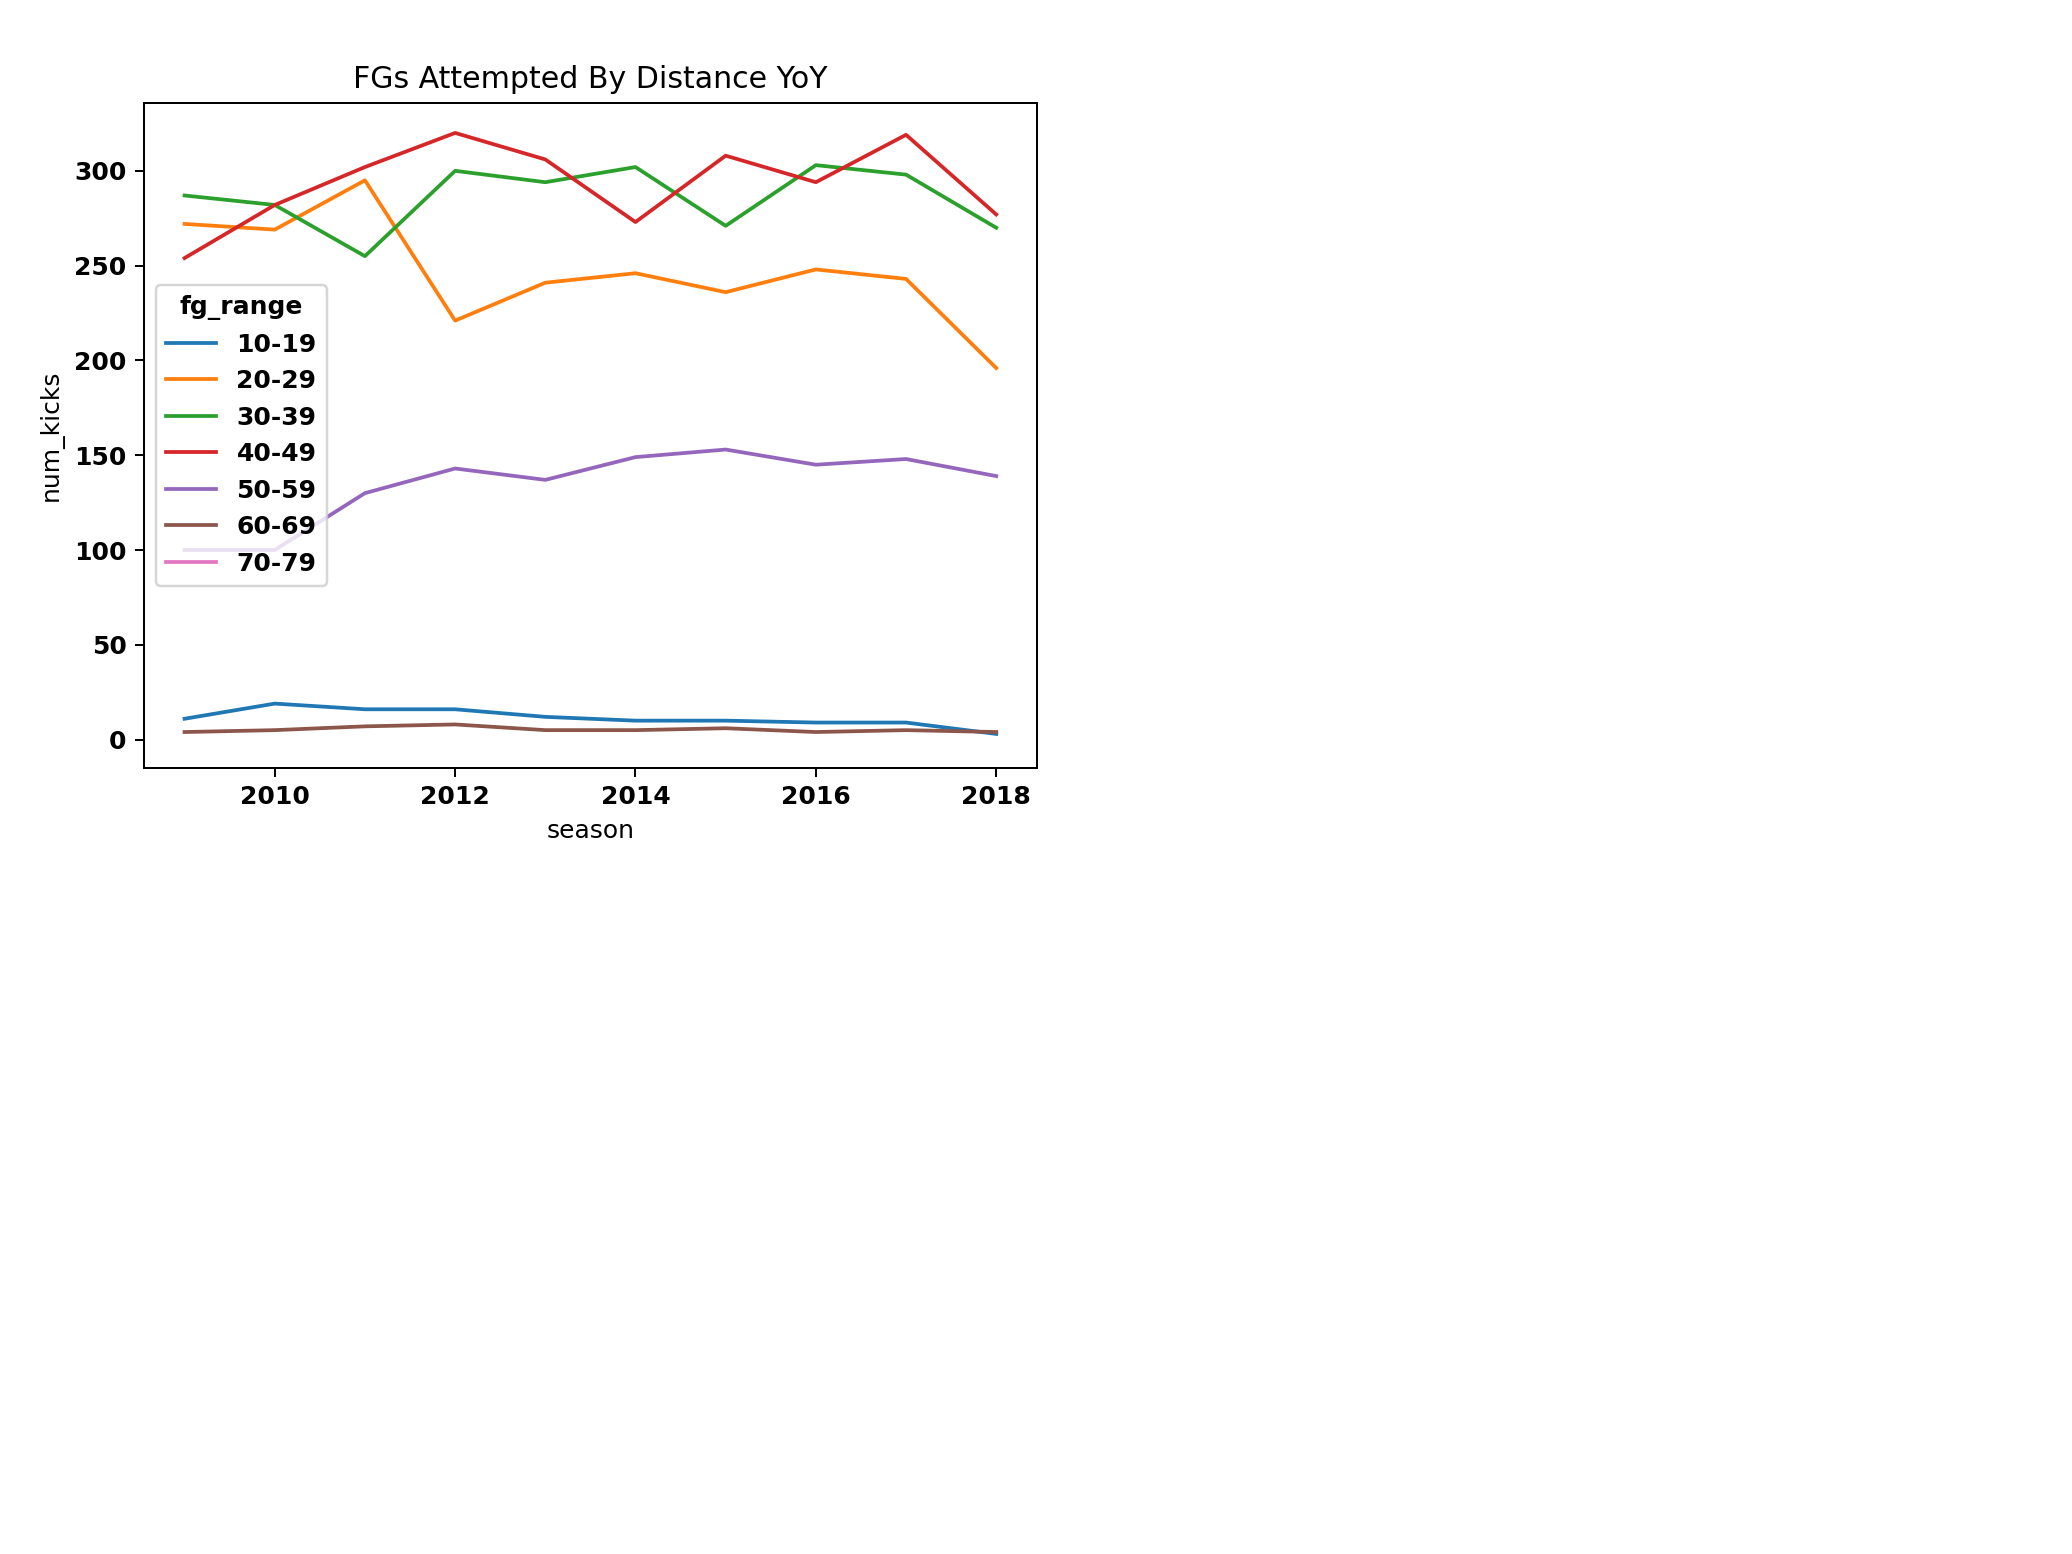

In [47]:
fig, ax = plt.subplots()
sns.lineplot(data=fg_kicks_by_season.reset_index(), x='season', y='num_kicks', hue='fg_range', ax=ax);
ax.set_title("FGs Attempted By Distance YoY")
plt.show()

In [48]:
# Save the figure and close the plot so we can reuse
sleep(2)
plt.close()
fig.savefig("images/fg_attempted_by_season.png")

In [49]:
pct_fg_by_season = df[df['field_goal_result'] == 'made'].groupby(['season', 'fg_range']).agg({'field_goal_result': 'count'}).div(df[~df['field_goal_result'].isna()].groupby(['season', 'fg_range']).agg({'field_goal_result': 'count'})).rename(columns={"field_goal_result": "FG Pct"})

<IPython.core.display.Javascript object>


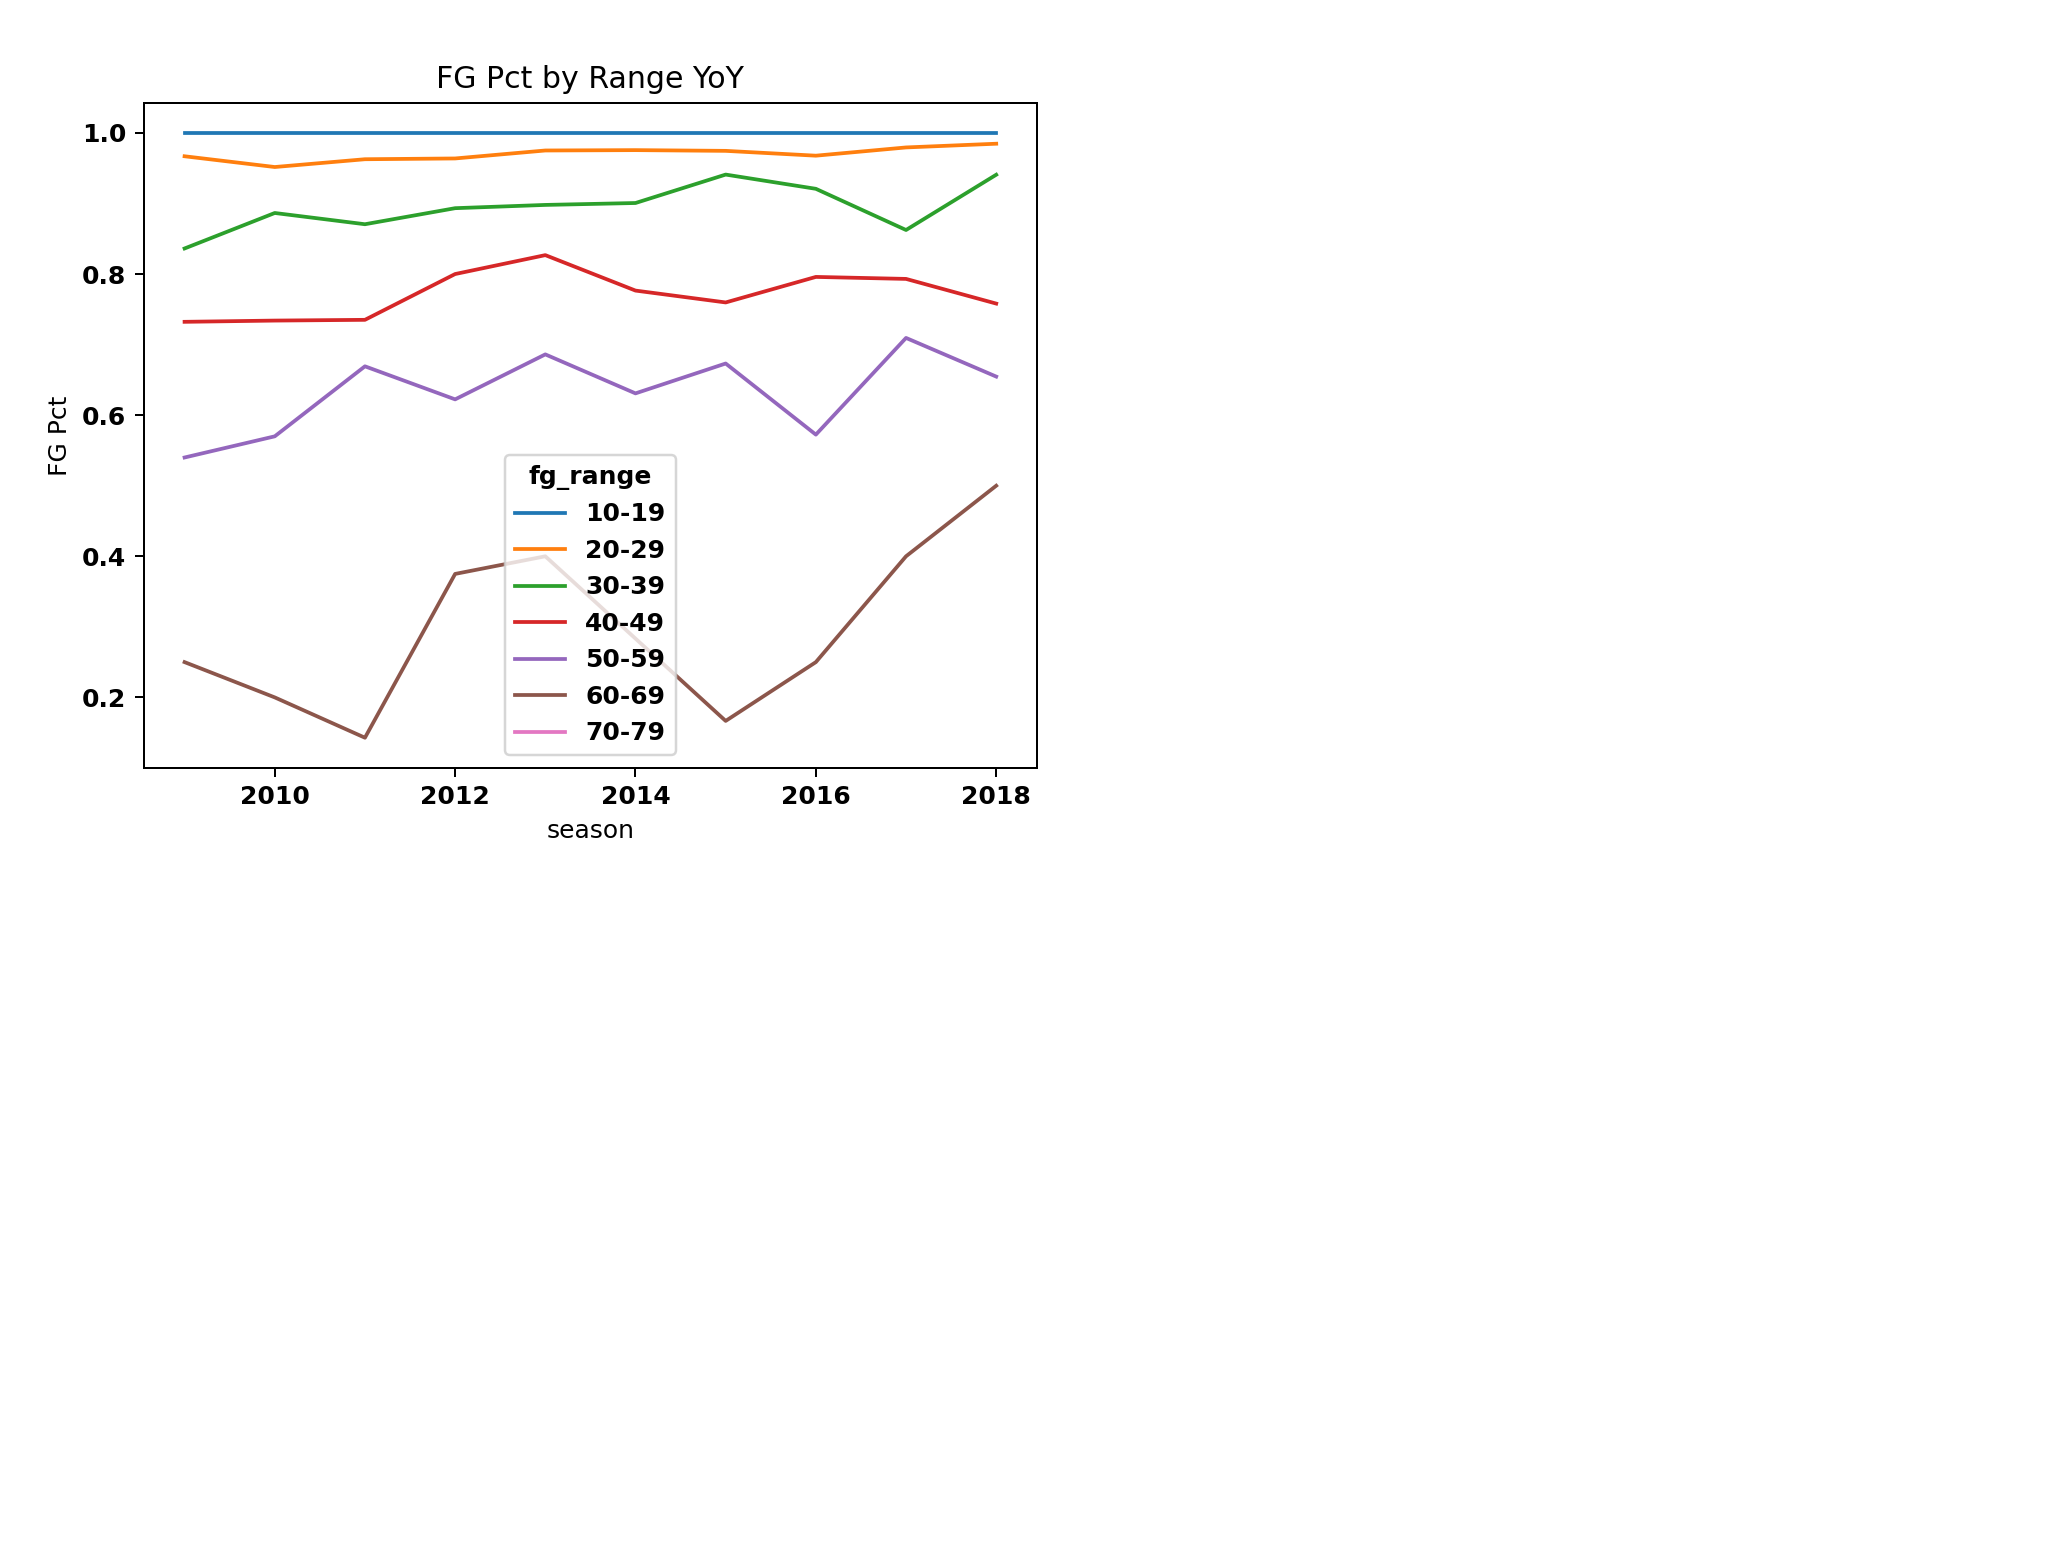

In [50]:
fig, ax = plt.subplots()
sns.lineplot(data=pct_fg_by_season.reset_index(), x='season', y='FG Pct', hue='fg_range', ax=ax);
ax.set_title("FG Pct by Range YoY")
plt.show()

In [51]:
# Save the figure and close the plot so we can reuse
sleep(2)
plt.close()
fig.savefig("images/fg_pct_by_season.png")

__Now, let's see the distributions across months__

In [52]:
# Convert to a datetime object since it wasn't already
df['game_date'] = pd.to_datetime(df['game_date'])

In [53]:
df['game_month'] = df['game_date'].dt.month_name()

In [54]:
df.game_month.unique()

array(['September', 'October', 'November', 'December', 'January'],
      dtype=object)

In [55]:
play_types_by_month = df[df['play_type'].isin(['pass', 'run'])].groupby(['game_month', 'play_type']).size().to_frame("num_plays")

In [56]:
play_types_by_month

num_plays
game_month play_type           
December   pass           47974
           run            35383
January    pass            5794
           run             4258
November   pass           46420
           run            32998
October    pass           46457
           run            32503
September  pass           40032
           run            27550

<IPython.core.display.Javascript object>


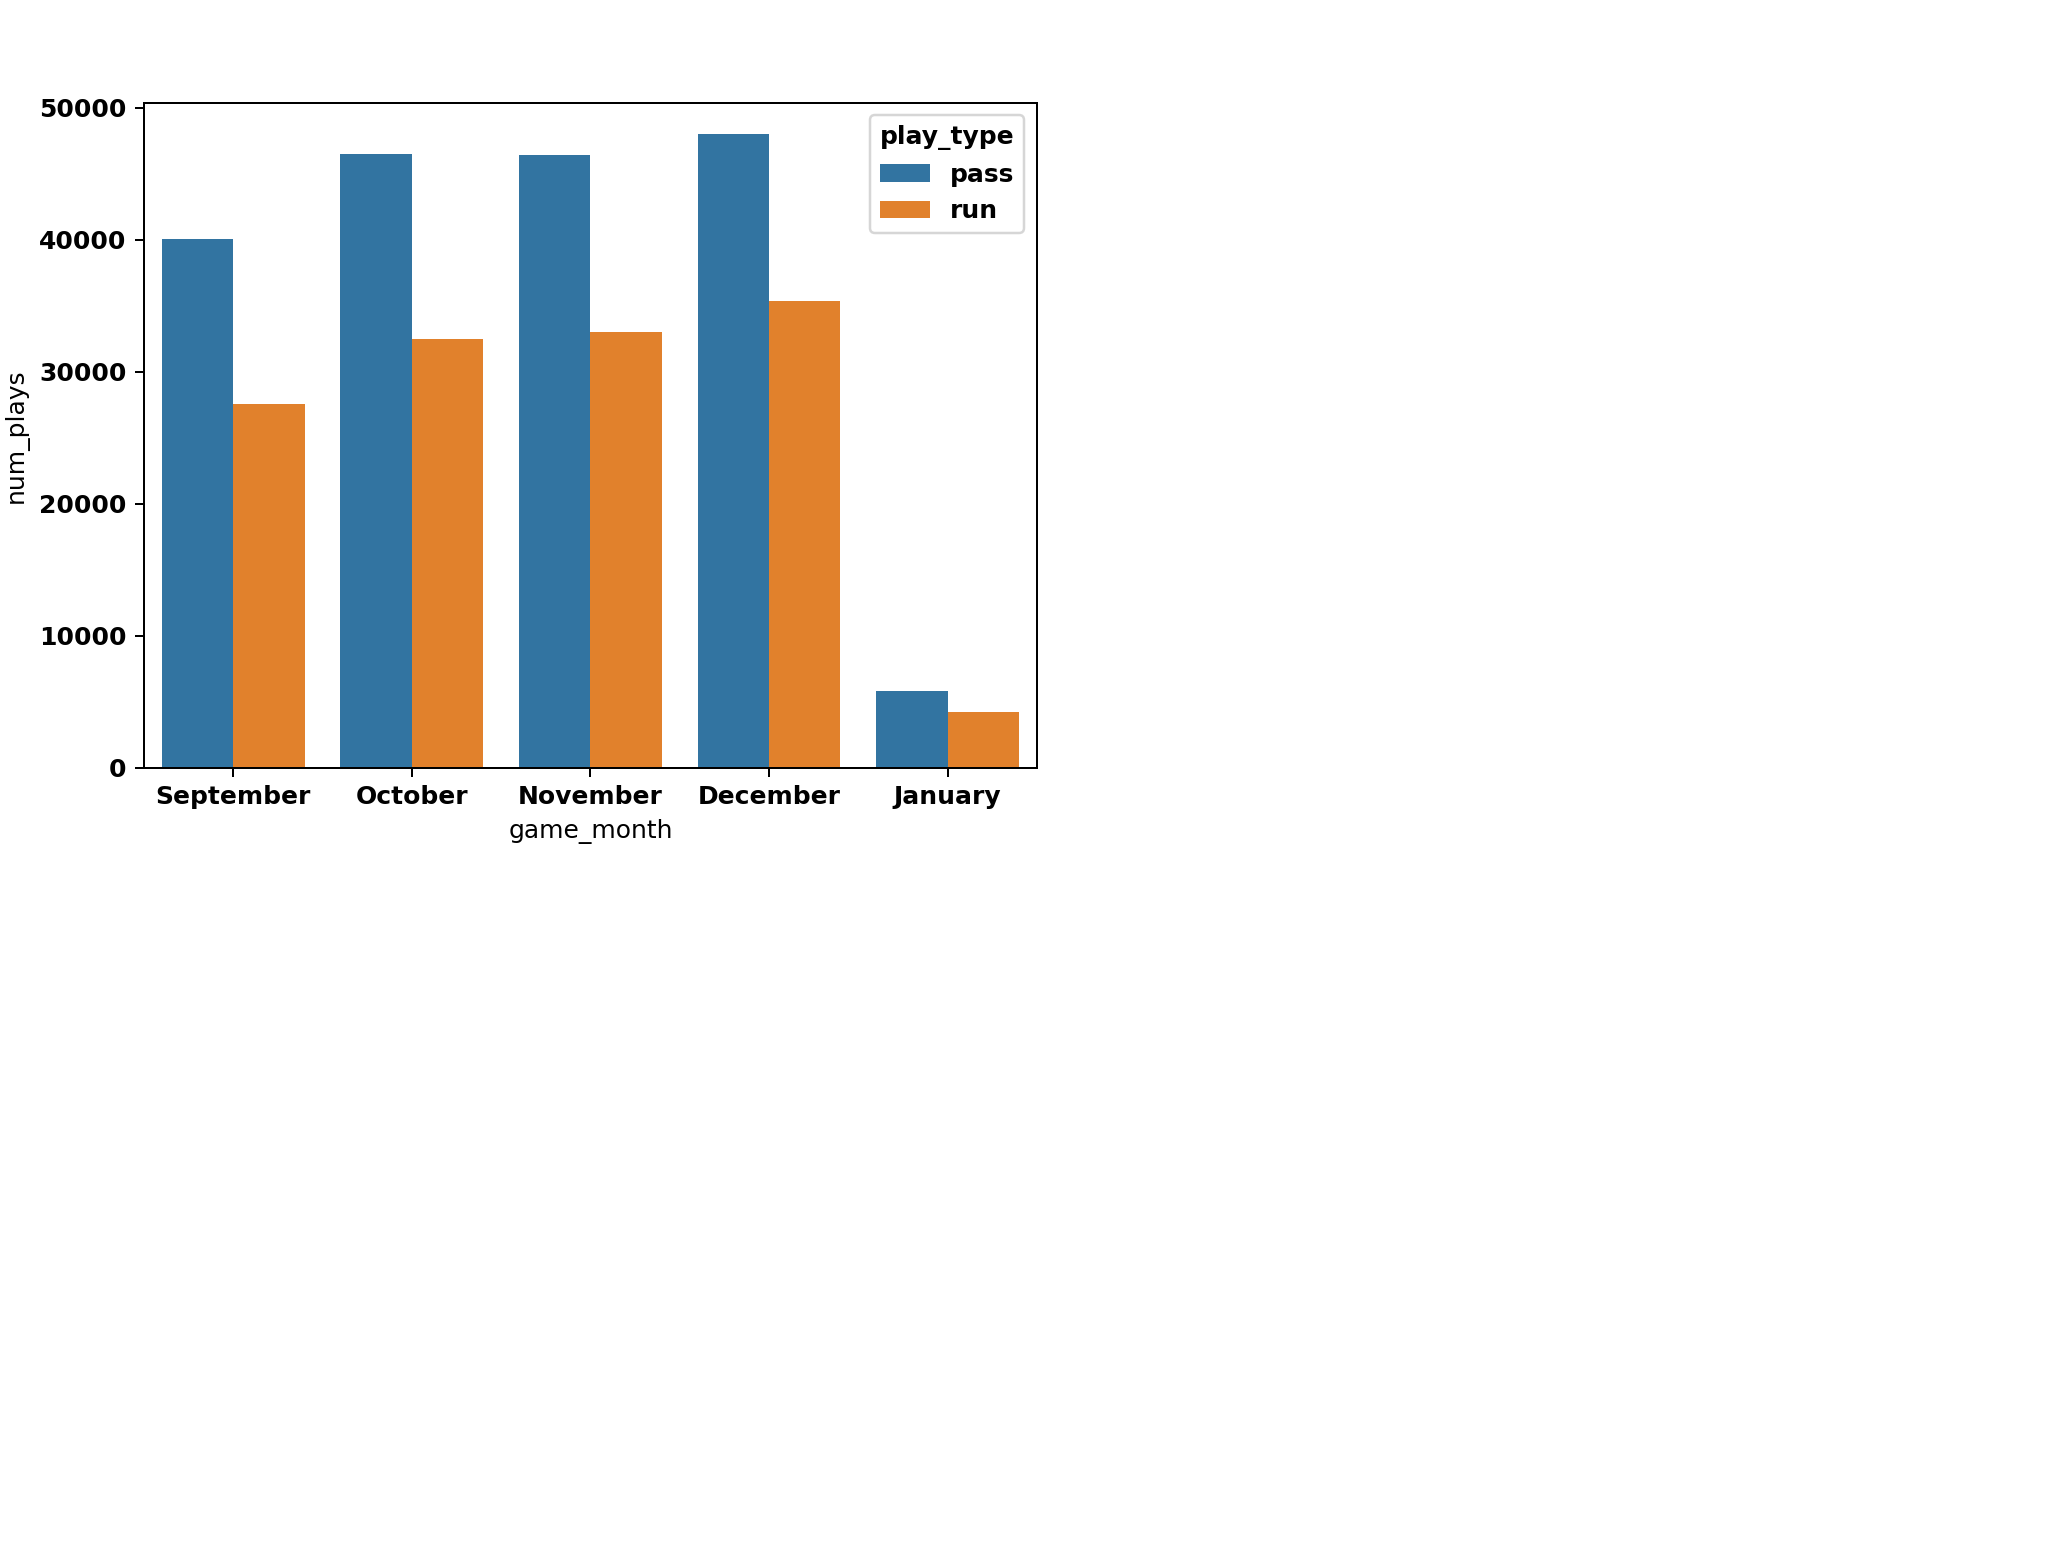

In [57]:
fig, ax = plt.subplots()
sns.barplot(data=play_types_by_month.reset_index(), x='game_month', y='num_plays', hue='play_type', order=df.game_month.unique(), ax=ax);
plt.show()

In [58]:
sleep(2)
plt.close()

In [59]:
df[df['play_type'].isin(['pass', 'run'])].groupby(['game_month', 'play_type']).size()

game_month  play_type
December    pass         47974
            run          35383
January     pass          5794
            run           4258
November    pass         46420
            run          32998
October     pass         46457
            run          32503
September   pass         40032
            run          27550
dtype: int64

In [60]:
df[df['play_type'].isin(['pass', 'run'])].groupby(['game_month'])['game_id'].nunique()

game_month
December     666
January       80
November     619
October      624
September    537
Name: game_id, dtype: int64

In [61]:
df[df['play_type'].isin(['pass', 'run'])].groupby(['game_month', 'play_type']).size()/df[df['play_type'].isin(['pass', 'run'])].groupby(['game_month'])['game_id'].nunique()

game_month  play_type
December    pass         72.033033
            run          53.127628
January     pass         72.425000
            run          53.225000
November    pass         74.991922
            run          53.308562
October     pass         74.450321
            run          52.088141
September   pass         74.547486
            run          51.303538
dtype: float64

In [62]:
plays_per_game_by_month_and_season = (df[df['play_type'].isin(['pass', 'run'])].groupby(['season', 'game_month', 'play_type']).size()/df.groupby(['season', 'game_month'])['game_id'].nunique()/2).to_frame("num_plays")

<IPython.core.display.Javascript object>


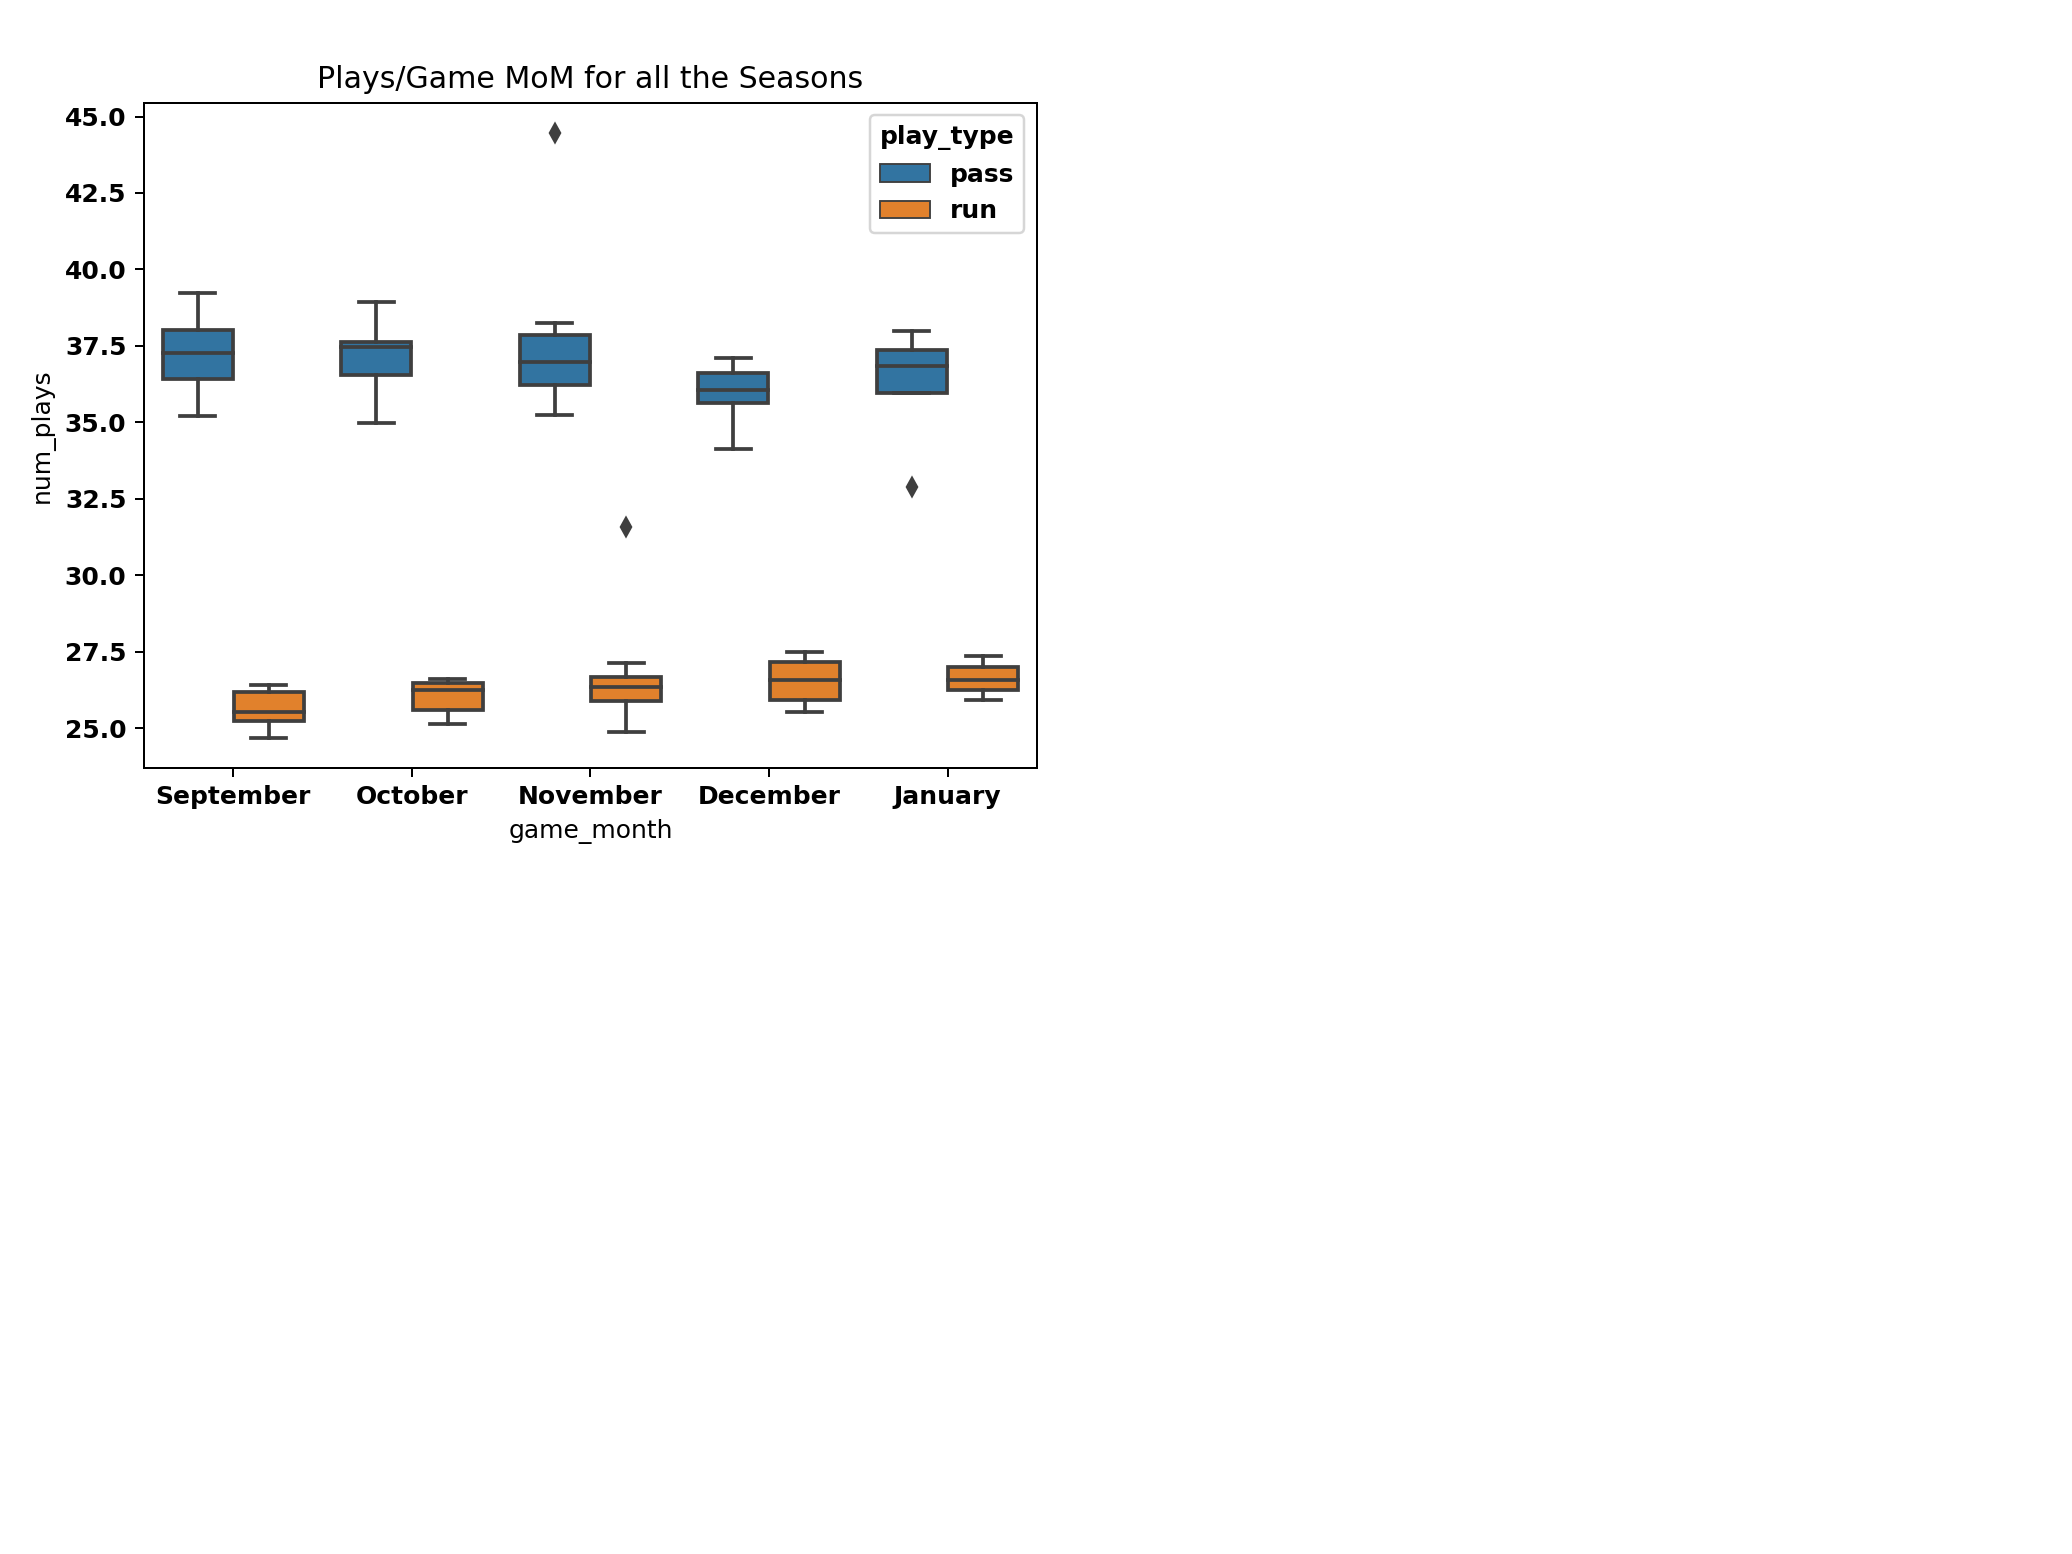

In [63]:
fig, ax = plt.subplots()
sns.boxplot(data=plays_per_game_by_month_and_season.reset_index(), x='game_month', y='num_plays', hue='play_type', order=df.game_month.unique(), ax=ax);
ax.set_title("Plays/Game MoM for all the Seasons");
plt.show()

In [64]:
# Save the figure and close the plot so we can reuse
sleep(2)
plt.close()
fig.savefig("images/play_type_by_month_and_season_box.png")

<IPython.core.display.Javascript object>


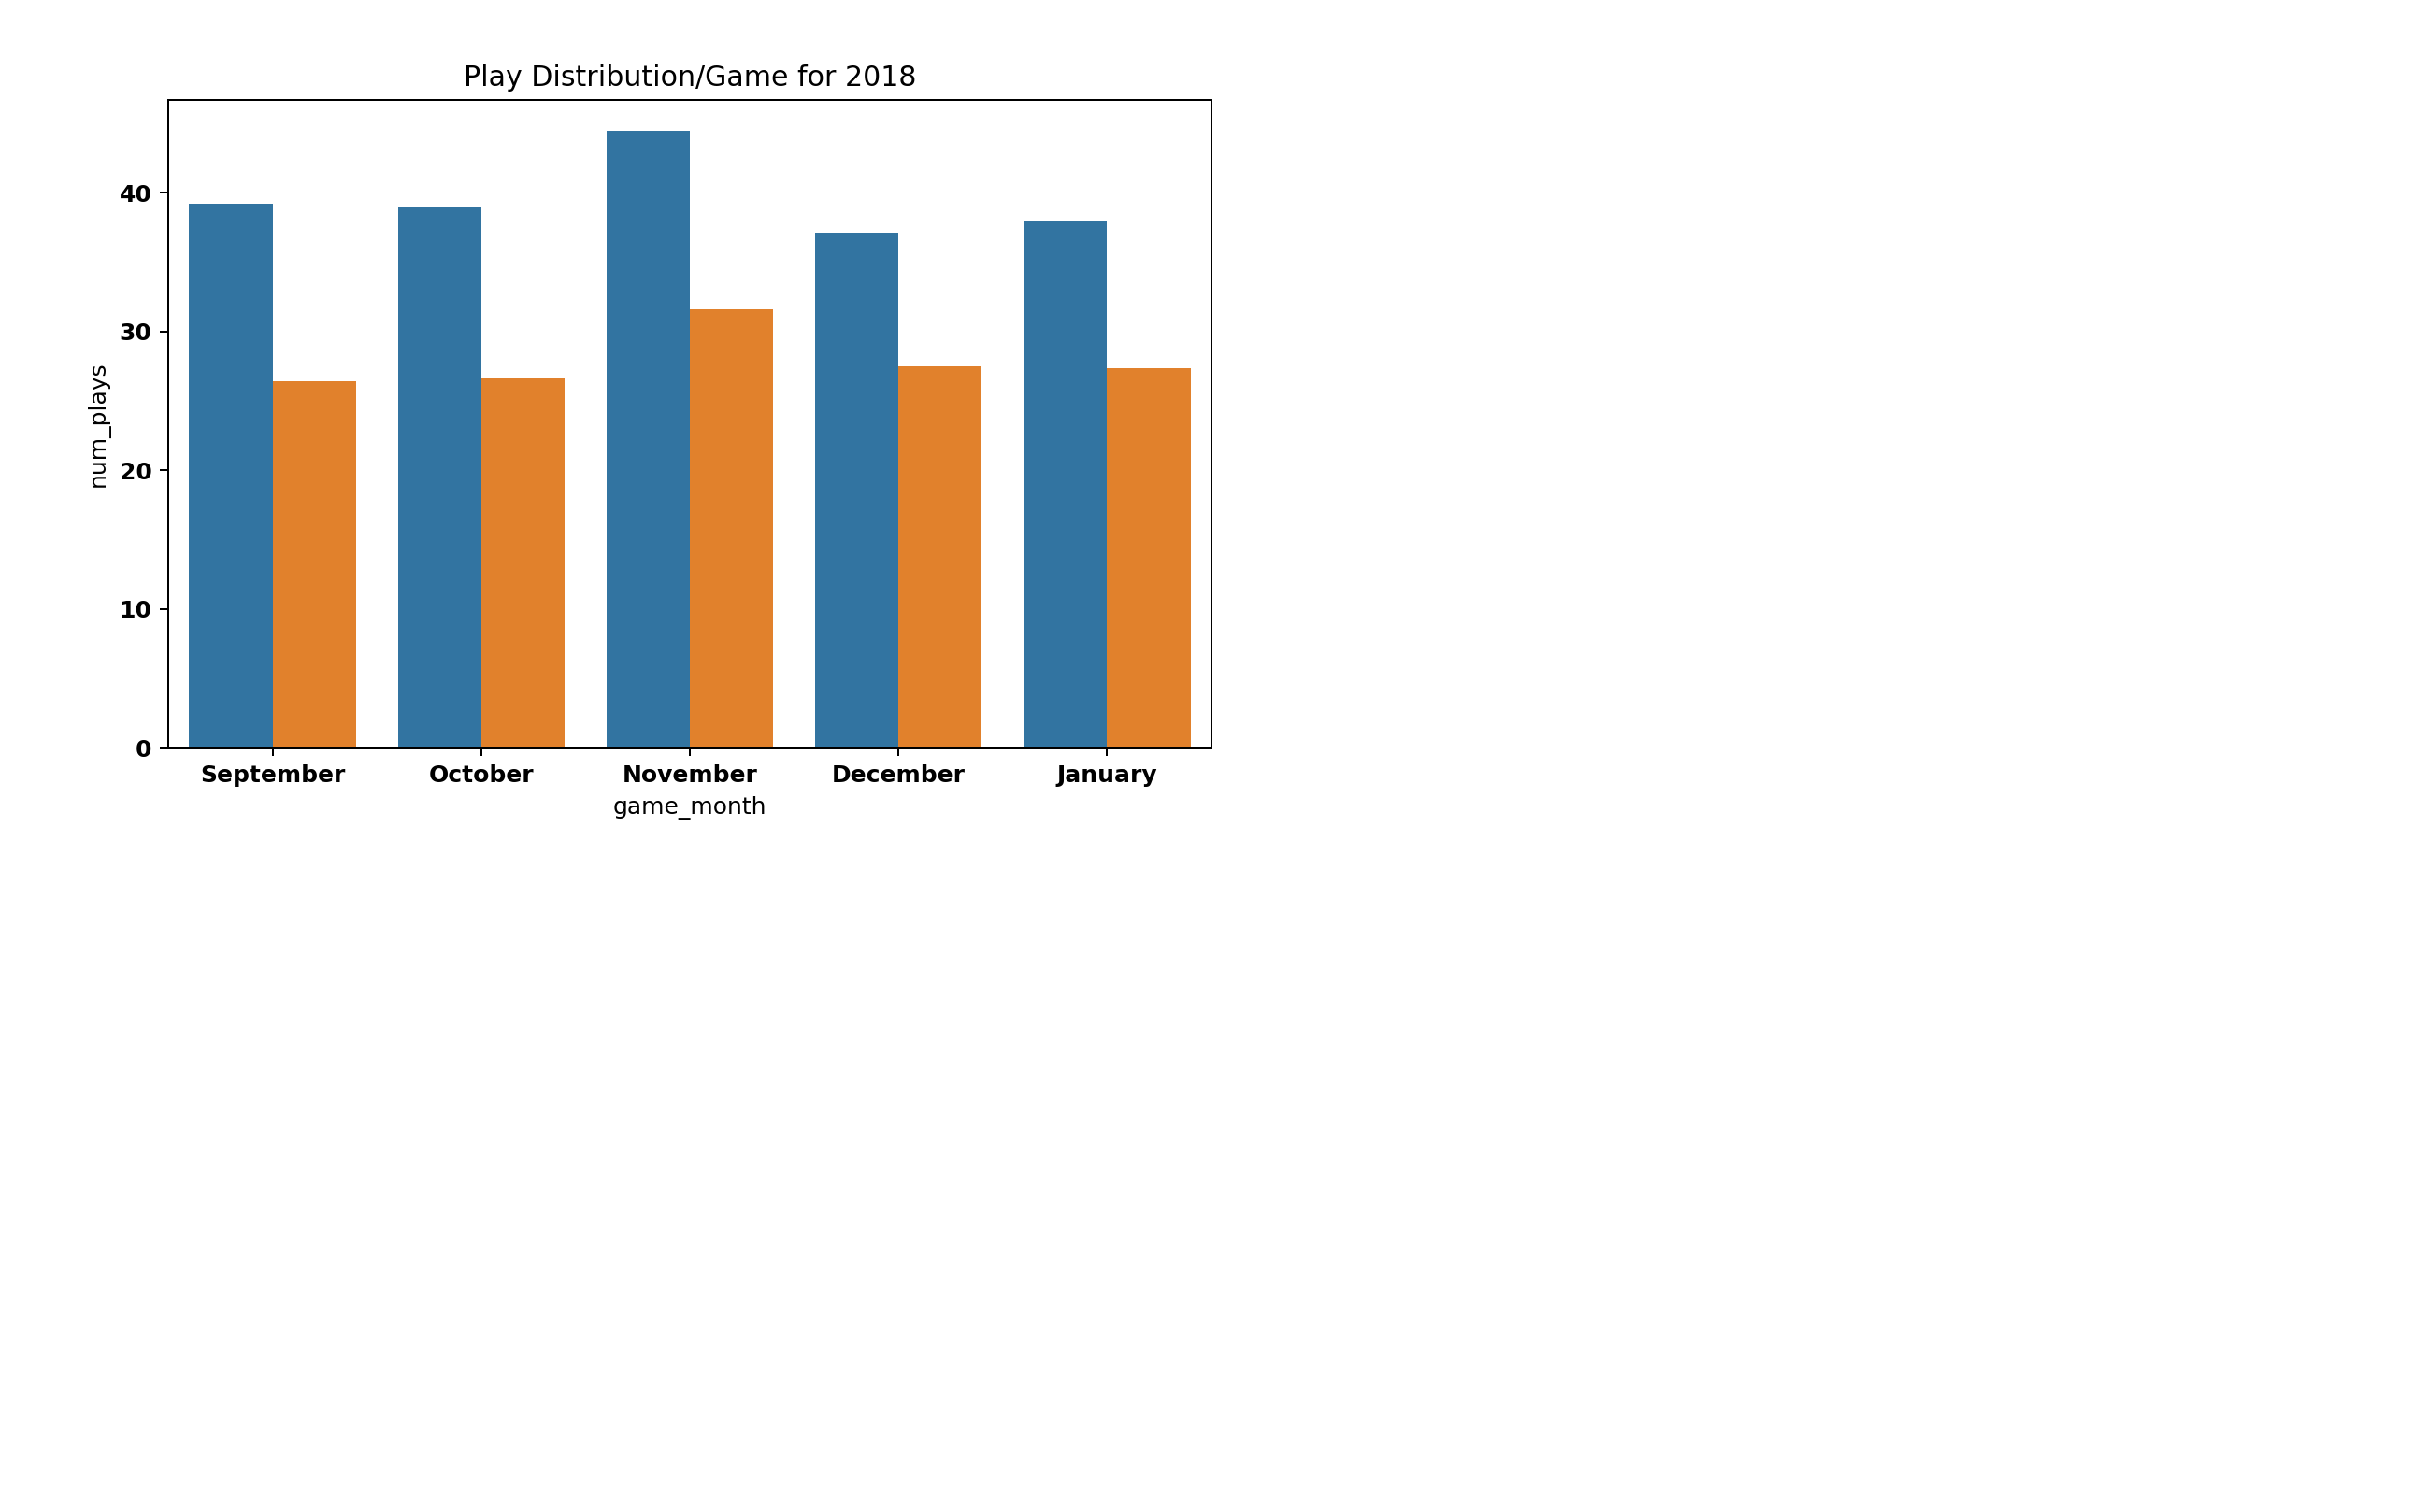

In [65]:
fig, ax = plt.subplots(figsize=(8,5))
for season in range(2009, 2019):
    sns.barplot(data=plays_per_game_by_month_and_season.loc[season].reset_index(), x='game_month', y='num_plays', hue='play_type', order=df.game_month.unique(), ax=ax)
    ax.set_title(f"Play Distribution/Game for {season}")
    ax.get_legend().remove()
    plt.show()
    fig.canvas.draw()
    sleep(0.5)

In [66]:
sleep(2)
plt.close()

__Let's check how the completion percentage has changed over the seasons__

In [22]:
completion_pct_by_season = df[(df['play_type'] == 'pass') & (df['incomplete_pass'] == 0)].groupby(['season']).size()/df[(df['play_type'] == 'pass')].groupby(['season']).size()

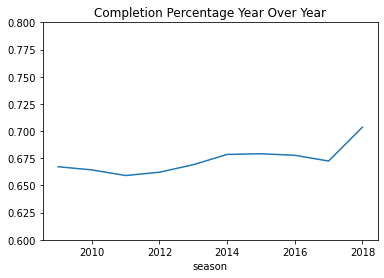

In [24]:
fig, ax = plt.subplots()
sns.lineplot(data=completion_pct_by_season, ax=ax)
ax.set(ylim=(.6, .8));
ax.set_title("Completion Percentage Year Over Year")
plt.show()

In [26]:
# Save the figure and close the plot so we can reuse
sleep(2)
plt.close()
fig.savefig("images/completion_pct_year_over_year.png")